K Means Clustering

In [ ]:
# Import CSV
import pandas as pd
df = pd.read_csv('sentiment_scores.csv')
df.head()

,Nominee,Negative,Neutral,Positive,Compound
0,Shogun,0.054,0.871,0.075,0.3597
1,3 Body Problem,0.080,0.771,0.149,0.8950
2,Fallout,0.061,0.742,0.196,0.9621
3,Mr and Mrs Smith,0.034,0.847,0.118,0.8558
4,Slow Horses,0.013,0.798,0.189,0.9730


In [ ]:
# Scores
X = df[['Negative', 'Neutral', 'Positive', 'Compound']]

X.head()


,Negative,Neutral,Positive,Compound
0,0.054,0.871,0.075,0.3597
1,0.080,0.771,0.149,0.8950
2,0.061,0.742,0.196,0.9621
3,0.034,0.847,0.118,0.8558
4,0.013,0.798,0.189,0.9730


In [ ]:
# K Means Clustering

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Set number of clusters
kmeans = KMeans(n_clusters=3)
# Fit model to data
kmeans.fit(X)
# Get cluster labels
clusters = kmeans.labels_
# Add labels to dataframe
df['Cluster'] = clusters
df

,Nominee,Negative,Neutral,Positive,Compound,Cluster
0,Shogun,0.054,0.871,0.075,0.3597,1
1,3 Body Problem,0.080,0.771,0.149,0.8950,2
2,Fallout,0.061,0.742,0.196,0.9621,2
3,Mr and Mrs Smith,0.034,0.847,0.118,0.8558,0
4,Slow Horses,0.013,0.798,0.189,0.9730,2
5,The Crown,0.068,0.741,0.191,0.9366,2
6,The Gilded Age,0.017,0.823,0.160,0.9404,0
7,The Morning Show,0.000,0.855,0.145,0.9231,0


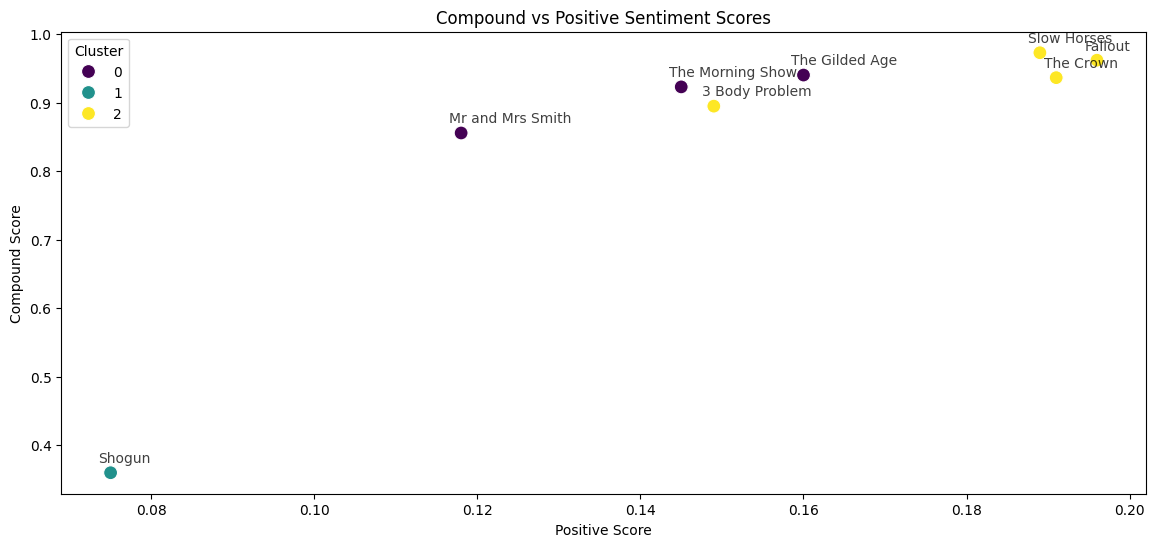

In [ ]:
# Visualize Clusters
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatterplot
sns.scatterplot(data = df, x = 'Positive', y = 'Compound', hue = 'Cluster', palette = 'viridis', s = 100)

# Add labels and title
plt.xlabel('Positive Score')
plt.ylabel('Compound Score')
plt.title('Compound vs Positive Sentiment Scores')

# Annotate each point
for i, txt in enumerate(df['Nominee']):
    plt.annotate(txt, (df['Positive'].iloc[i] - 0.0015, df['Compound'].iloc[i] + 0.015), fontsize=10, alpha=0.75)

# Display plot
plt.show()

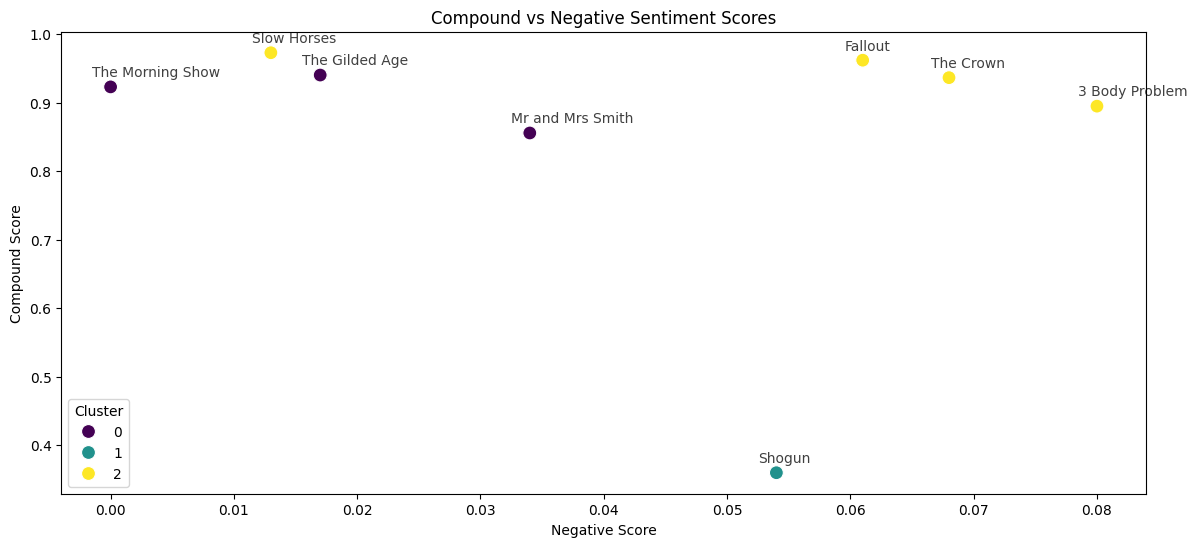

In [ ]:
# Visualize Clusters

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatterplot
sns.scatterplot(data = df, x = 'Negative', y = 'Compound', hue = 'Cluster', palette = 'viridis', s = 100)

# Add labels and title
plt.xlabel('Negative Score')
plt.ylabel('Compound Score')
plt.title('Compound vs Negative Sentiment Scores')

# Annotate each point
for i, txt in enumerate(df['Nominee']):
    plt.annotate(txt, (df['Negative'].iloc[i] - 0.0015, df['Compound'].iloc[i] + 0.015), fontsize=10, alpha=0.75)

# Display plot
plt.show()

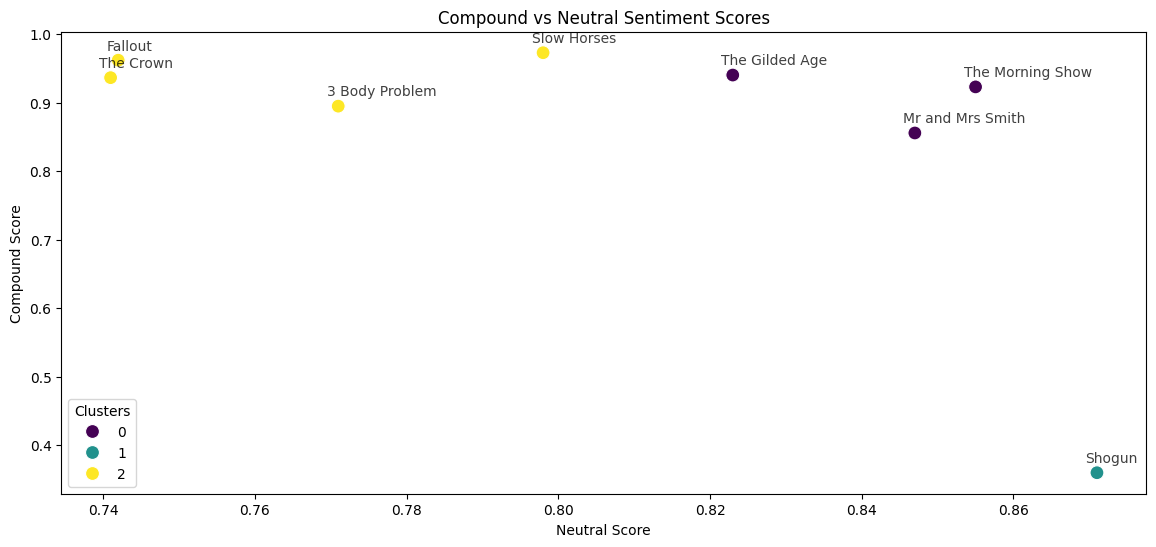

In [ ]:
# Visualize Clusters

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatterplot
sns.scatterplot(data = df, x = 'Neutral', y = 'Compound', hue = 'Cluster', palette = 'viridis', s = 100)

# Add labels and title
plt.xlabel('Neutral Score')
plt.ylabel('Compound Score')
plt.title('Compound vs Neutral Sentiment Scores')

# Annotate each point
for i, txt in enumerate(df['Nominee']):
    plt.annotate(txt, (df['Neutral'].iloc[i] - 0.0015, df['Compound'].iloc[i] + 0.015), fontsize=10, alpha=0.75)

# Display plot
plt.legend(title='Clusters', loc='lower left')
plt.show()

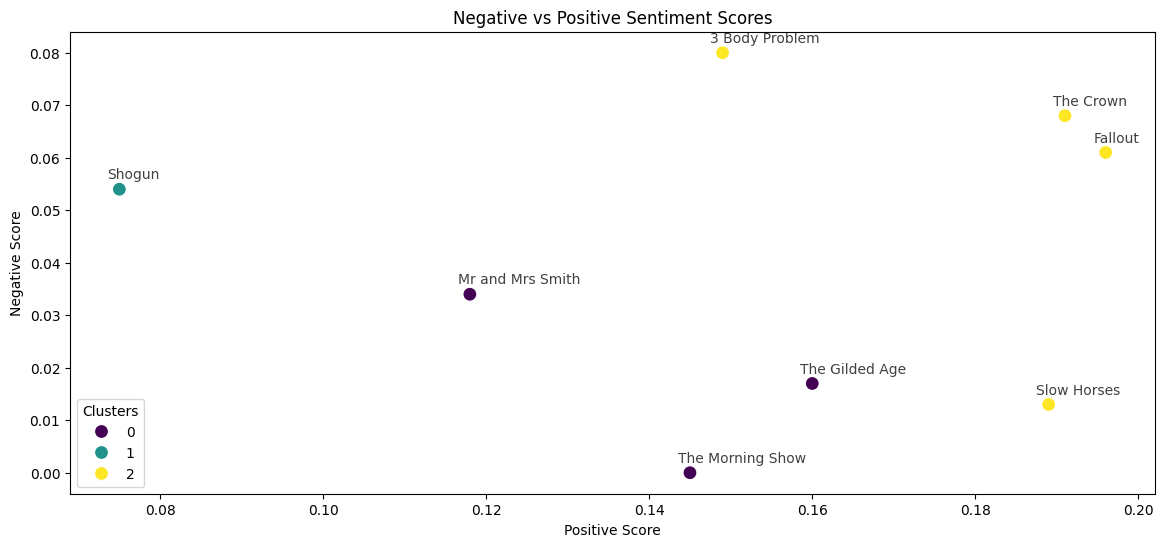

In [ ]:
# Visualize Clusters
import seaborn as sns

# Set figure size
plt.figure(figsize=(14, 6))

# Create scatterplot
sns.scatterplot(data = df, x = 'Positive', y = 'Negative', hue = 'Cluster', palette = 'viridis', s = 100)

# Add labels and title
plt.xlabel('Positive Score')
plt.ylabel('Negative Score')
plt.title('Negative vs Positive Sentiment Scores')

# Annotate each point
for i, txt in enumerate(df['Nominee']):
    plt.annotate(txt, (df['Positive'].iloc[i] - 0.0015, df['Negative'].iloc[i] + 0.002), fontsize=10, alpha=0.75)

# Display plot
plt.legend(title='Clusters', loc='lower left')
plt.show()

Logistic Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

threshold = df['Compound'].max()  # Set a threshold based on the max score
df['Synthetic_Winner'] = np.where(df['Compound'] >= threshold, 1, 0)

# Split into features and labels
X = df[['Compound', 'Positive', 'Negative', 'Neutral']]
y = df['Synthetic_Winner']

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities of winning
df['Predicted_Probability'] = model.predict_proba(X)[:, 1]

# Display the predictions
print(df[['Nominee', 'Compound', 'Predicted_Probability']])

            Nominee  Compound  Predicted_Probability
0            Shogun    0.3597               0.118632
1    3 Body Problem    0.8950               0.125401
2           Fallout    0.9621               0.126501
3  Mr and Mrs Smith    0.8558               0.124875
4       Slow Horses    0.9730               0.126713
5         The Crown    0.9366               0.126142
6    The Gilded Age    0.9404               0.126160
7  The Morning Show    0.9231               0.125912


<ipython-input-311-e1119dc34d21>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='Predicted_Probability', x='Nominee', data = df_sorted, palette = 'Blues_d')


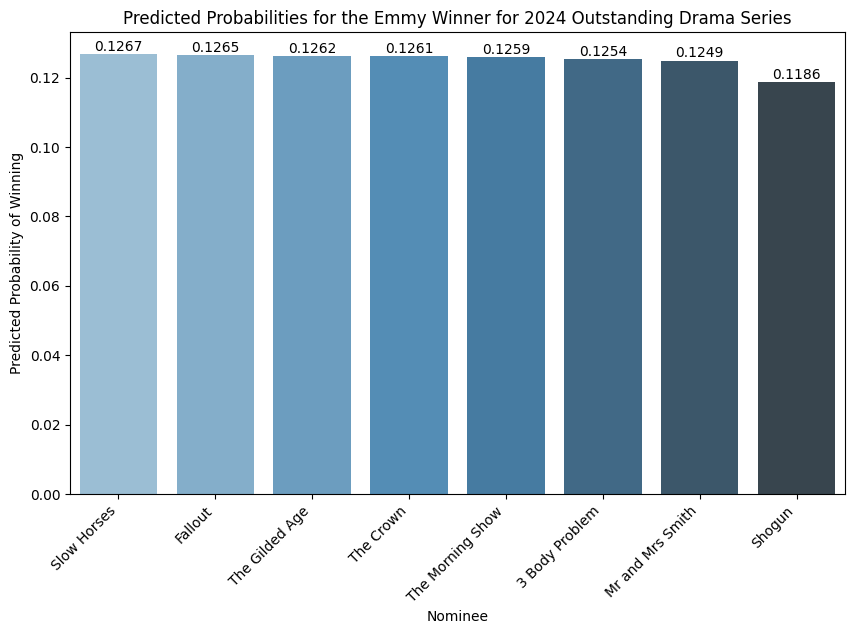

In [ ]:
# Barplot of Predicted Probabilities

# Sort the dataframe by predicted probability for better visualization
df_sorted = df.sort_values(by='Predicted_Probability', ascending=False)

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Create a barplot probability as the y axis
sns.barplot(y='Predicted_Probability', x='Nominee', data = df_sorted, palette = 'Blues_d')

# Add labels and title
plt.ylabel('Predicted Probability of Winning')
plt.xlabel('Nominee')
plt.title('Predicted Probabilities for the Emmy Winner for 2024 Outstanding Drama Series')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Annotate each bar with its predicted probability
for i, v in enumerate(df_sorted['Predicted_Probability']):
    plt.text(i, v + 0.0001, f'{v:.4f}', ha='center', va='bottom')

# Show the plot
plt.show()


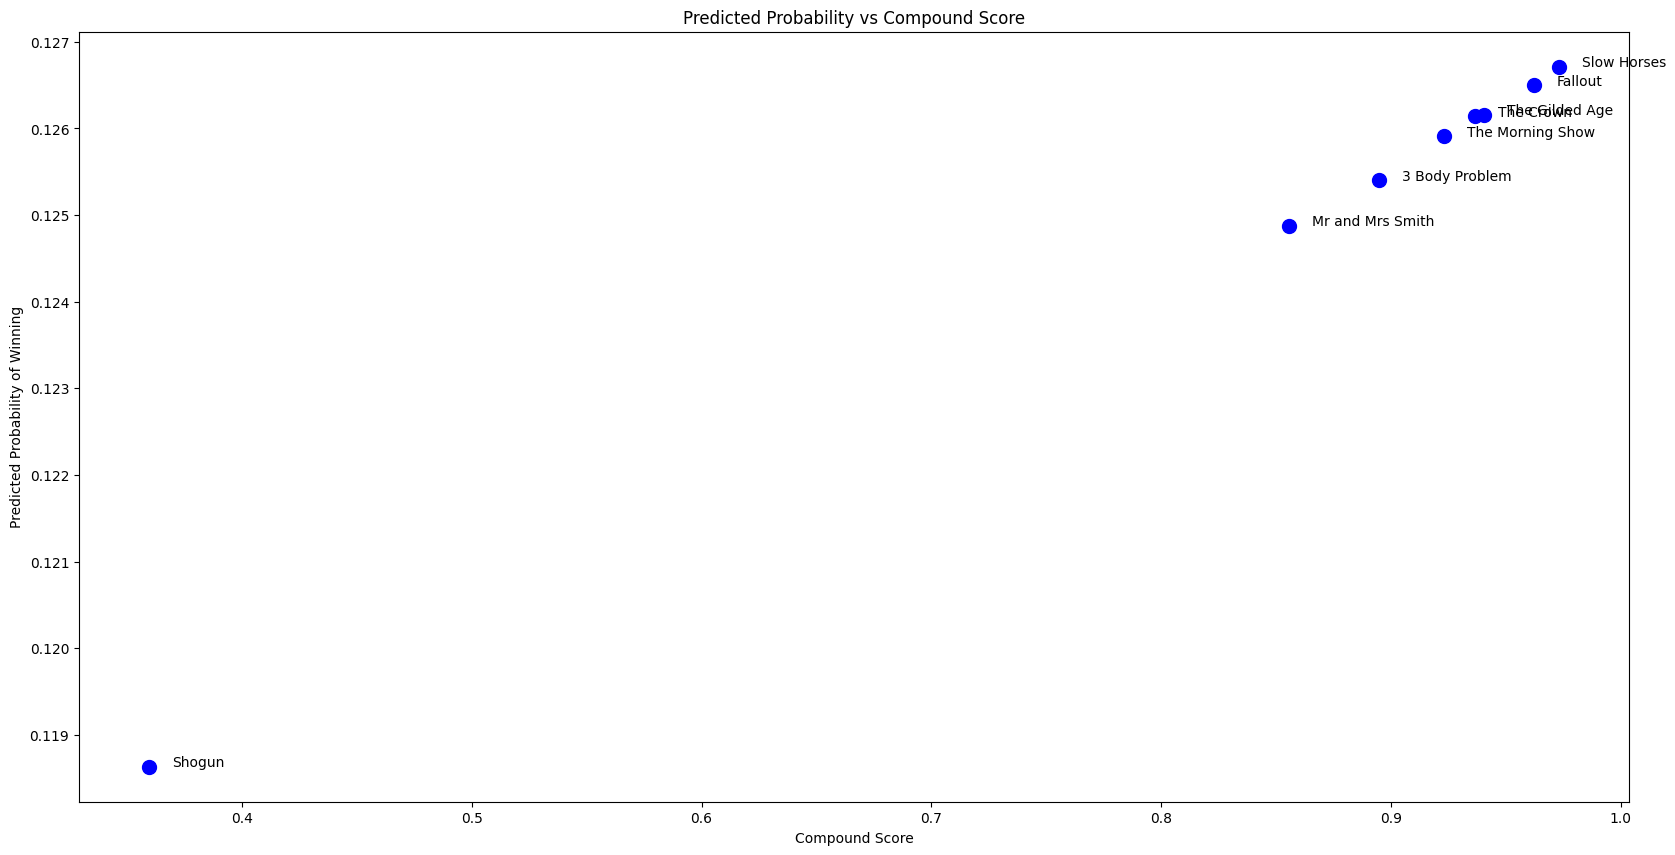

In [ ]:
# Scatterplot of predicted probability and compound sentiment score

# Set the size of the plot
plt.figure(figsize=(20, 10))

# Create a scatter plot with compound scores on the x-axis and predicted probabilities on the y-axis
plt.scatter(df['Compound'], df['Predicted_Probability'], color='blue', s=100)

# Add jitter to space out points
df_sorted['jittered_compound'] = df_sorted['Compound'] + np.random.normal(0, 0.1, size=len(df_sorted))  # Small noise added

# Annotate each point with the corresponding nominee
for i, nominee in enumerate(df['Nominee']):
    plt.text(df['Compound'][i] + 0.01, df['Predicted_Probability'][i], nominee)

# Add labels and title
plt.xlabel('Compound Score')
plt.ylabel('Predicted Probability of Winning')
plt.title('Predicted Probability vs Compound Score')

# Show the plot
plt.show()


Kruskal-Wallis Test

In [ ]:
import pandas as pd
from scipy.stats import kruskal


# Separate the performance data for each nominee
nominees = df['Nominee'].unique()
grouped_compound = [df[df['Nominee'] == nominee]['Compound'].values for nominee in nominees]

# Conduct the Kruskal-Wallis H test
kruskal_result = kruskal(*grouped_compound)

# Print the results
print("Kruskal-Wallis result:")
print("H-statistic:", kruskal_result.statistic)
print("p-value:", kruskal_result.pvalue)

# Interpret the results
alpha = 0.05
if kruskal_result.pvalue < alpha:
    print("Reject the null hypothesis: At least one nominee has a significantly different compound score.")
else:
    print("Fail to reject the null hypothesis: No significant difference in compound scores among nominees.")


Kruskal-Wallis result:
H-statistic: 7.0
p-value: 0.42887985755305486
Fail to reject the null hypothesis: No significant difference in compound scores among nominees.
